In [1]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle
import glob

awkward version  1.10.1
coffea version  0.7.19


In [2]:
eras = [
    'UL16NanoAOD', 
    'UL16NanoAODAPV', 
    'UL17NanoAOD', 
    'UL18NanoAOD'
       ]
htbins = ['70to100', '100to200', '200to400', '400to600', '600to800', '800to1200', '1200to2500', '2500toInf']
filestr = '/mnt/data/cms/store/mc/RunIISummer20%sv9/DYJetsToLL_M-50_HT-%s_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8/NANOAODSIM/*/*/*.root'
fileset = {}

for era in eras: 
    for htbin in htbins : 
        infiles = glob.glob(filestr % (era, htbin) )
        binname = era+htbin
        if binname not in fileset:
            fileset[binname] = []
        fileset[binname] = fileset[binname] + [*infiles]

In [46]:
datasets

dict_keys(['UL16NanoAOD70to100', 'UL16NanoAOD100to200', 'UL16NanoAOD200to400', 'UL16NanoAOD400to600', 'UL16NanoAOD600to800', 'UL16NanoAOD800to1200', 'UL16NanoAOD1200to2500', 'UL16NanoAOD2500toInf', 'UL16NanoAODAPV70to100', 'UL16NanoAODAPV100to200', 'UL16NanoAODAPV200to400', 'UL16NanoAODAPV400to600', 'UL16NanoAODAPV600to800', 'UL16NanoAODAPV800to1200', 'UL16NanoAODAPV1200to2500', 'UL16NanoAODAPV2500toInf', 'UL17NanoAOD70to100', 'UL17NanoAOD100to200', 'UL17NanoAOD200to400', 'UL17NanoAOD400to600', 'UL17NanoAOD600to800', 'UL17NanoAOD800to1200', 'UL17NanoAOD1200to2500', 'UL17NanoAOD2500toInf', 'UL18NanoAOD70to100', 'UL18NanoAOD100to200', 'UL18NanoAOD200to400', 'UL18NanoAOD400to600', 'UL18NanoAOD600to800', 'UL18NanoAOD800to1200', 'UL18NanoAOD1200to2500', 'UL18NanoAOD2500toInf'])

In [15]:
class Counter(processor.ProcessorABC):
    def __init__(self ):
        weights_axis = hist.axis.Regular(150, 0, 10, name="w", label="Weights")
        dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        
        ### Plots of things during the selection process / for debugging with fine binning
        h_w = hist.Hist(dataset_axis, weights_axis, storage="weight", label="Counts")
        
        self.hists = {
            "w":h_w
        }
        
        self.means_stddevs = defaultdict()
    
    @property
    def accumulator(self):
        return self.hists

    
    # we will receive a NanoEvents instead of a coffea DataFrame
    def process(self, events):
        dataset = events.metadata['dataset']
        if dataset not in self.means_stddevs : 
            average = np.average( events["LHEWeight"].originalXWGTUP )
            stddev = np.std( events["LHEWeight"].originalXWGTUP )
            self.means_stddevs[dataset] = (average, stddev)
            
        average,stddev = self.means_stddevs[dataset]
        vals = (events["LHEWeight"].originalXWGTUP - average ) / stddev
        
        self.hists['w'].fill( dataset=dataset, w=vals )
        
        return self.hists

    
    def postprocess(self, accumulator):
        return accumulator
    
    
    
    

In [16]:
run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=8),
    schema=NanoAODSchema,
    chunksize=1000000,
    maxchunks=10
)

output = run(
    fileset,
    "Events",
    processor_instance=Counter(),
)

Output()

UL18NanoAOD2500toInf
UL18NanoAOD2500toInf
UL18NanoAOD2500toInfUL18NanoAOD2500toInf

UL18NanoAOD2500toInf
UL18NanoAOD2500toInf
UL18NanoAOD2500toInf
UL18NanoAOD2500toInf
UL18NanoAOD2500toInf
UL18NanoAOD2500toInf
UL18NanoAOD1200to2500
UL18NanoAOD1200to2500UL18NanoAOD1200to2500

UL18NanoAOD1200to2500
UL18NanoAOD1200to2500
UL18NanoAOD1200to2500
UL18NanoAOD1200to2500
UL18NanoAOD800to1200
UL18NanoAOD1200to2500
UL18NanoAOD1200to2500
UL18NanoAOD800to1200
UL18NanoAOD1200to2500
UL18NanoAOD800to1200
UL18NanoAOD800to1200
UL18NanoAOD800to1200
UL18NanoAOD800to1200
UL18NanoAOD800to1200
UL18NanoAOD800to1200
UL18NanoAOD800to1200
UL18NanoAOD800to1200
UL18NanoAOD600to800
UL18NanoAOD600to800
UL18NanoAOD600to800
UL18NanoAOD600to800
UL18NanoAOD600to800
UL18NanoAOD600to800UL18NanoAOD600to800

UL18NanoAOD600to800
UL18NanoAOD600to800
UL18NanoAOD600to800
UL18NanoAOD400to600
UL18NanoAOD400to600
UL18NanoAOD400to600
UL18NanoAOD400to600UL18NanoAOD400to600

UL18NanoAOD400to600
UL18NanoAOD400to600
UL18NanoAOD400to600


/opt/conda/lib/python3.8/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(


UL16NanoAODAPV70to100
UL16NanoAODAPV70to100
UL16NanoAODAPV70to100
UL16NanoAODAPV70to100
UL16NanoAODAPV70to100
UL16NanoAODAPV70to100
UL16NanoAODAPV70to100
UL16NanoAODAPV70to100
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD2500toInf
UL16NanoAOD1200to2500
UL16NanoAOD1200to2500
UL16NanoAOD1200to2500
UL16NanoAOD1200to2500
UL16NanoAOD1200to2500
UL16NanoAOD1200to2500UL16NanoAOD1200to2500

UL16NanoAOD1200to2500
UL16NanoAOD1200to2500
UL16NanoAOD1200to2500
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD800to1200
UL16NanoAOD600to800
UL16NanoAOD600to800
UL16NanoAOD600to800
UL16NanoAOD600to800
UL16NanoAOD600to800
UL16NanoAOD600to800
UL16NanoAOD400to600
UL16NanoAOD600to800
UL16NanoAOD400to600
UL16

In [17]:
output

{'w': Hist(
   StrCategory(['UL18NanoAOD2500toInf', 'UL18NanoAOD1200to2500', 'UL18NanoAOD800to1200', 'UL18NanoAOD600to800', 'UL18NanoAOD400to600', 'UL18NanoAOD200to400', 'UL18NanoAOD100to200', 'UL18NanoAOD70to100', 'UL17NanoAOD2500toInf', 'UL17NanoAOD1200to2500', 'UL17NanoAOD800to1200', 'UL17NanoAOD600to800', 'UL17NanoAOD400to600', 'UL17NanoAOD200to400', 'UL17NanoAOD100to200', 'UL17NanoAOD70to100', 'UL16NanoAODAPV2500toInf', 'UL16NanoAODAPV1200to2500', 'UL16NanoAODAPV800to1200', 'UL16NanoAODAPV600to800', 'UL16NanoAODAPV400to600', 'UL16NanoAODAPV200to400', 'UL16NanoAODAPV100to200', 'UL16NanoAODAPV70to100', 'UL16NanoAOD2500toInf', 'UL16NanoAOD1200to2500', 'UL16NanoAOD800to1200', 'UL16NanoAOD600to800', 'UL16NanoAOD400to600', 'UL16NanoAOD200to400', 'UL16NanoAOD100to200', 'UL16NanoAOD70to100'], growth=True, name='dataset', label='Primary dataset'),
   Regular(150, 0, 10, name='w', label='Weights'),
   storage=Weight()) # Sum: WeightedSum(value=4.63827e+07, variance=4.63827e+07) (WeightedSum

In [19]:
import matplotlib.pyplot as plt

In [42]:
output['w'].axes[0].size

32

UL18NanoAOD2500toInf
UL18NanoAOD1200to2500
UL18NanoAOD800to1200
UL18NanoAOD600to800
UL18NanoAOD400to600
UL18NanoAOD200to400
UL18NanoAOD100to200
UL18NanoAOD70to100
UL17NanoAOD2500toInf
UL17NanoAOD1200to2500
UL17NanoAOD800to1200
UL17NanoAOD600to800
UL17NanoAOD400to600
UL17NanoAOD200to400
UL17NanoAOD100to200
UL17NanoAOD70to100
UL16NanoAODAPV2500toInf
UL16NanoAODAPV1200to2500
UL16NanoAODAPV800to1200
UL16NanoAODAPV600to800
UL16NanoAODAPV400to600
UL16NanoAODAPV200to400
UL16NanoAODAPV100to200
UL16NanoAODAPV70to100
UL16NanoAOD2500toInf
UL16NanoAOD1200to2500


/tmp/ipykernel_6614/2751315272.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(i)


UL16NanoAOD800to1200
UL16NanoAOD600to800
UL16NanoAOD400to600
UL16NanoAOD200to400
UL16NanoAOD100to200
UL16NanoAOD70to100


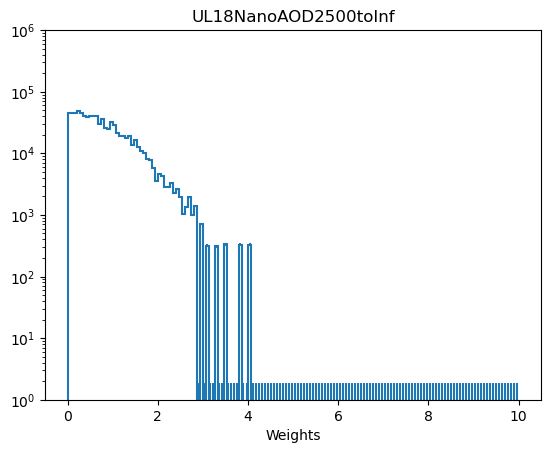

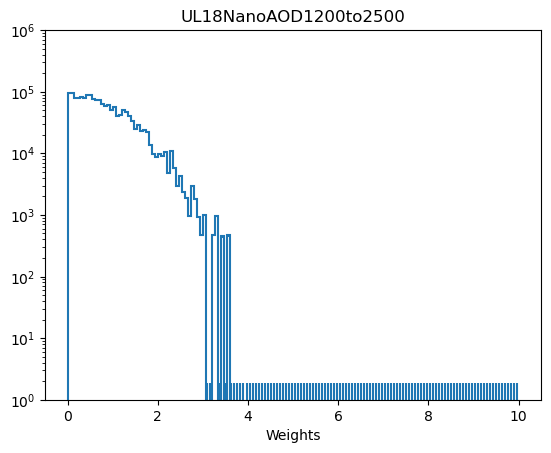

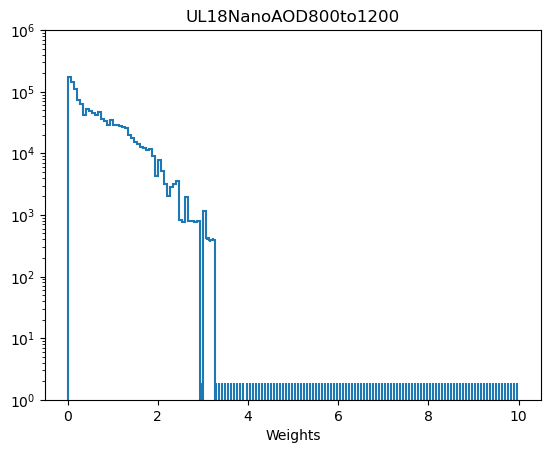

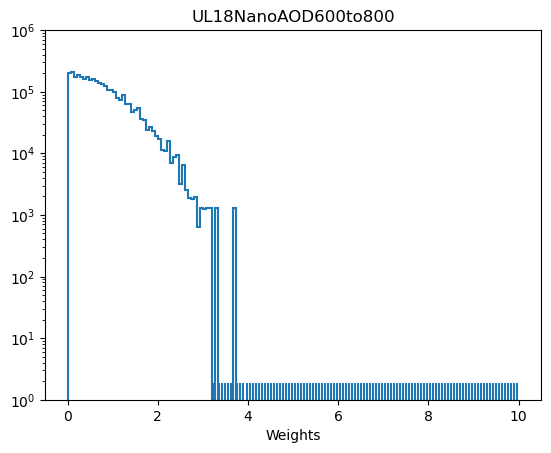

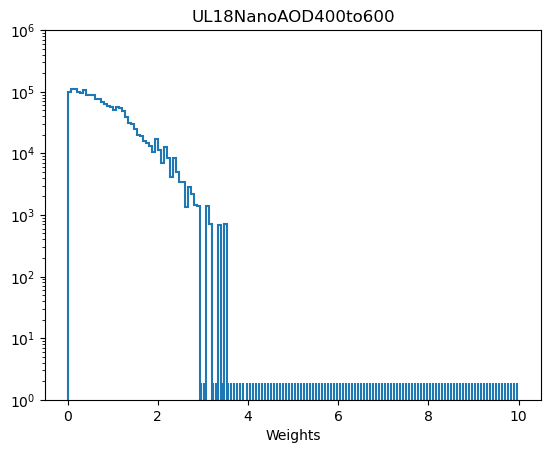

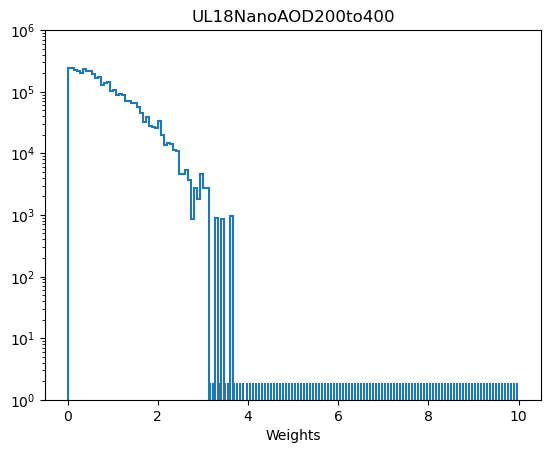

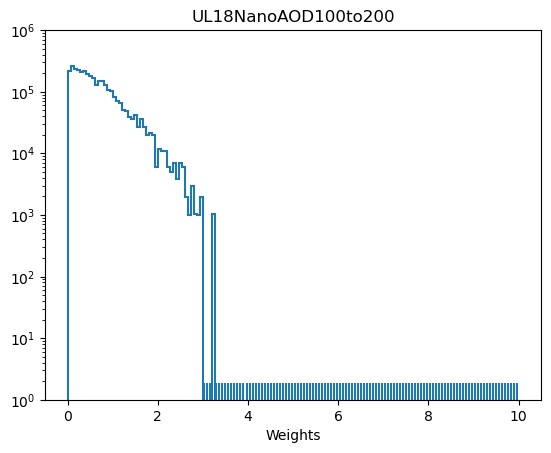

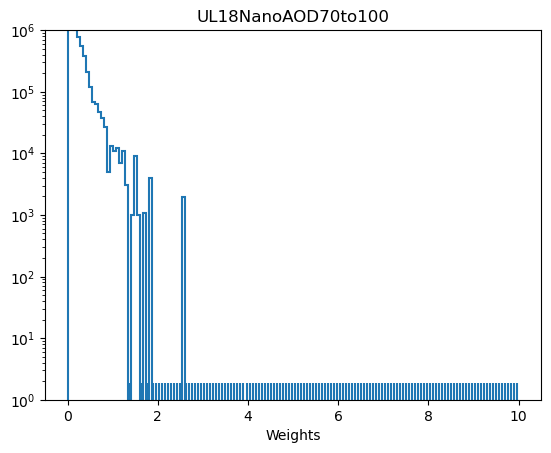

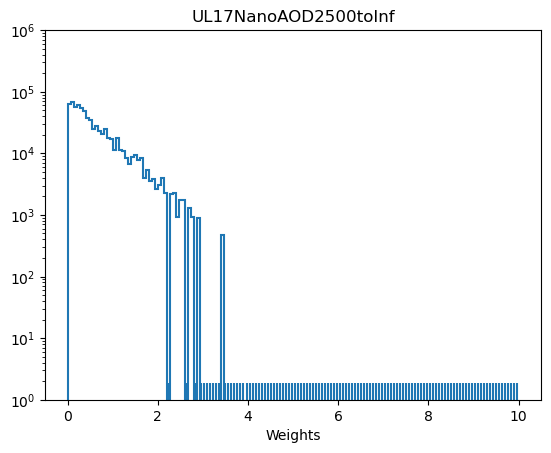

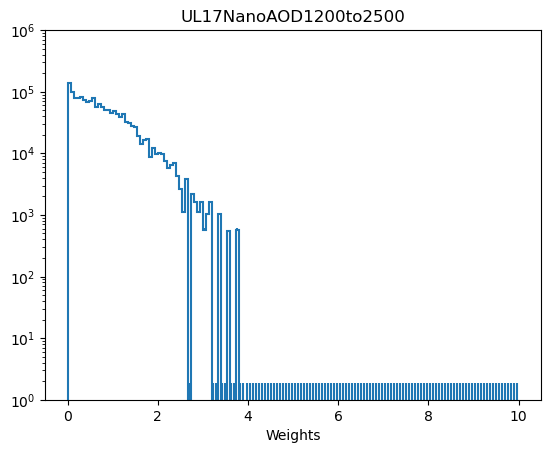

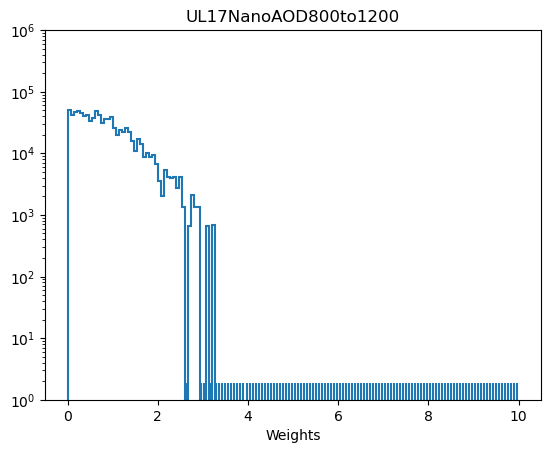

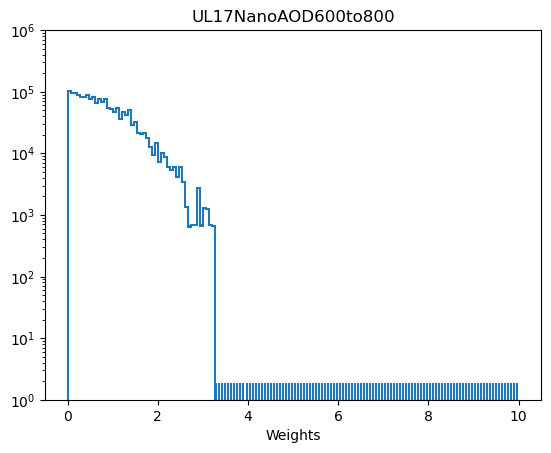

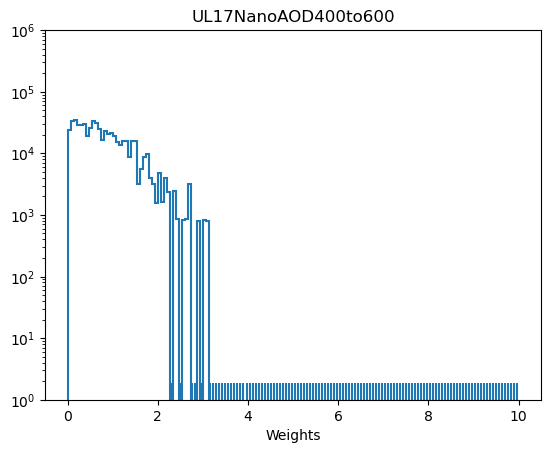

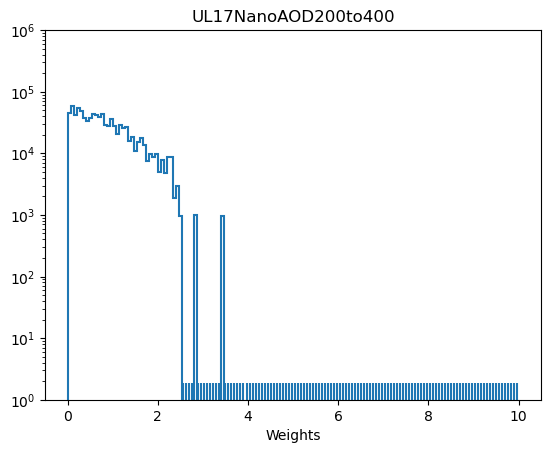

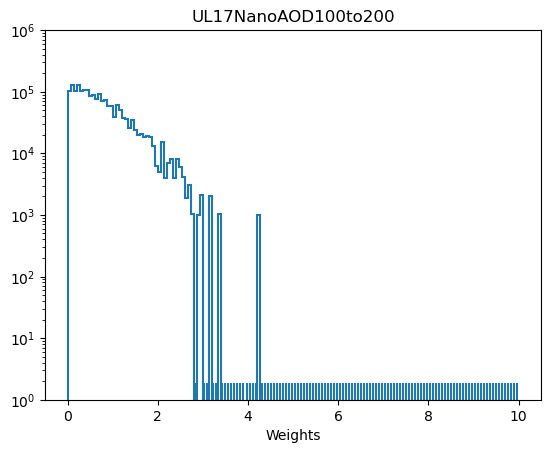

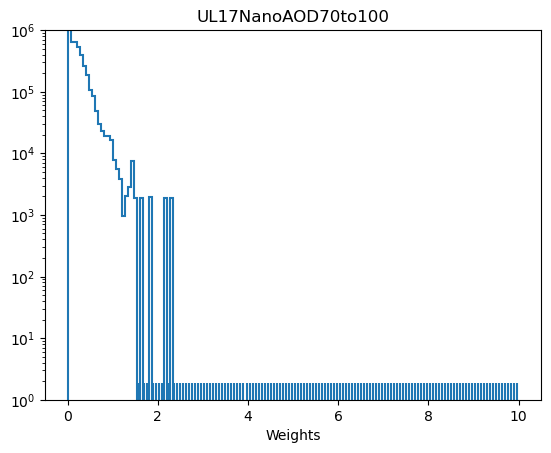

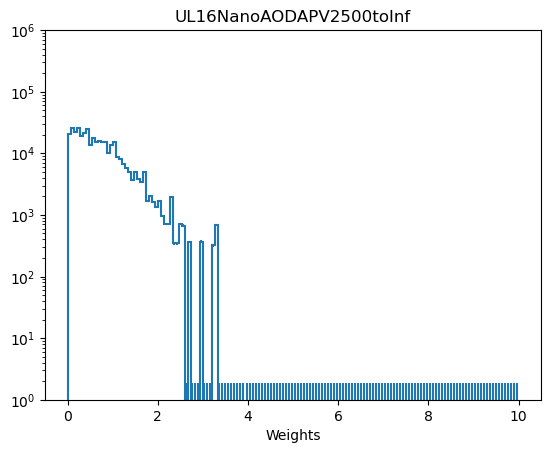

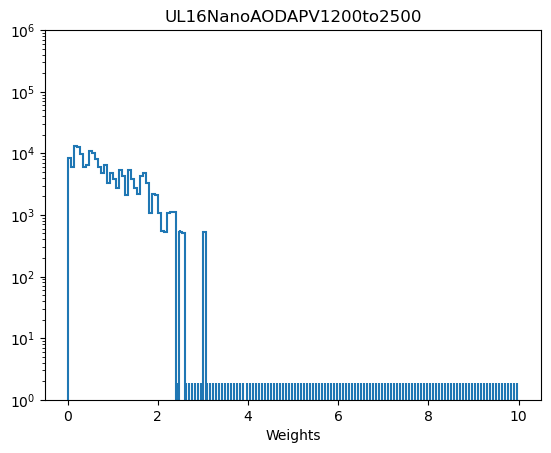

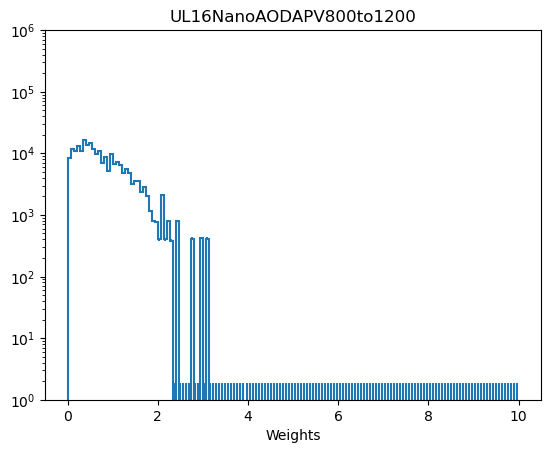

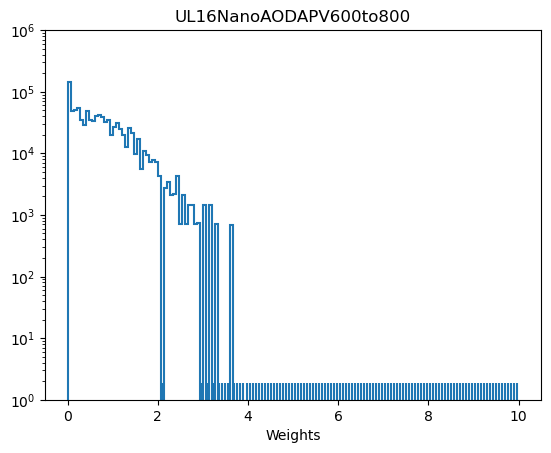

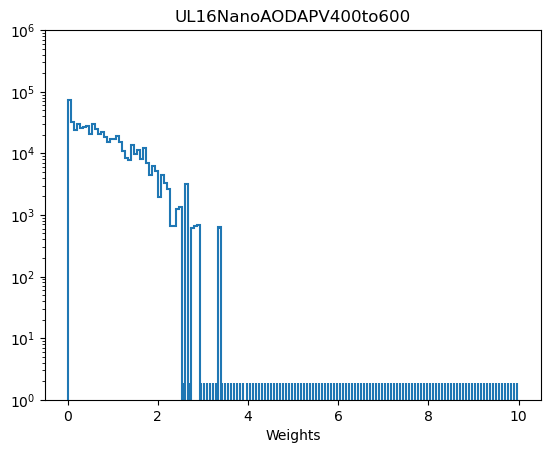

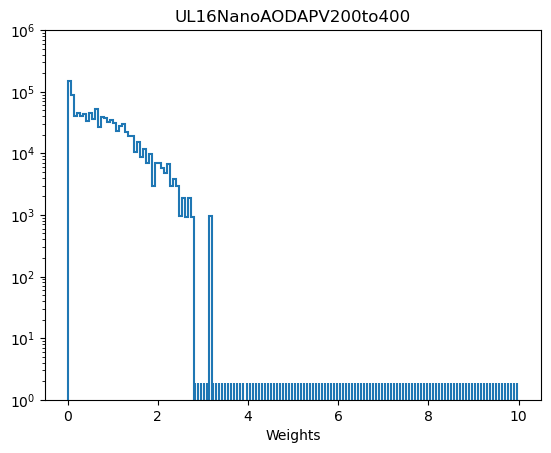

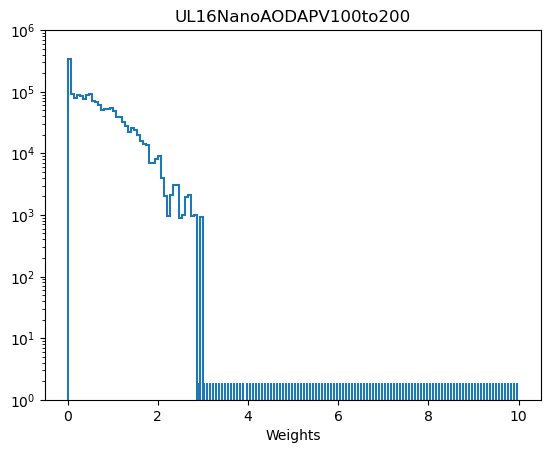

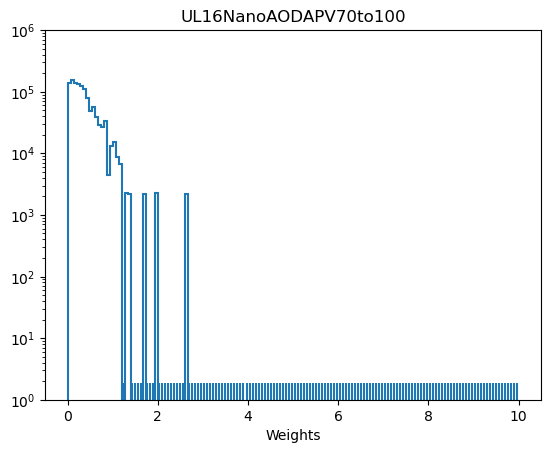

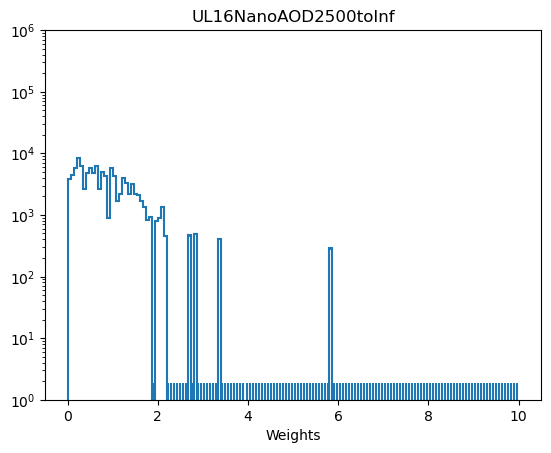

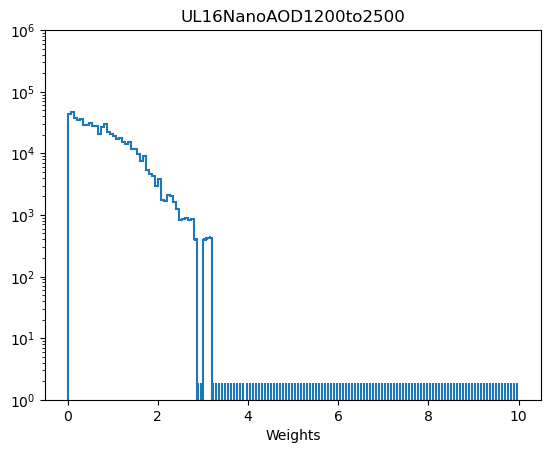

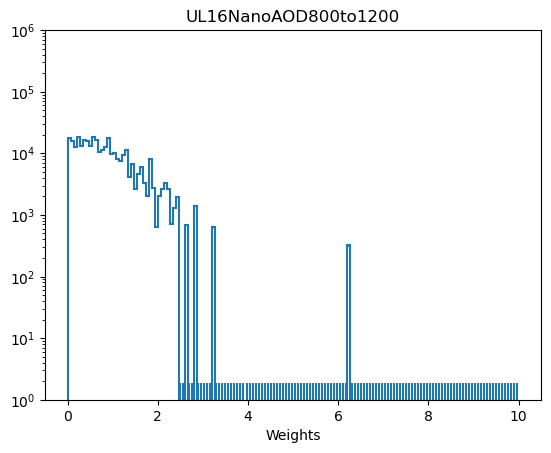

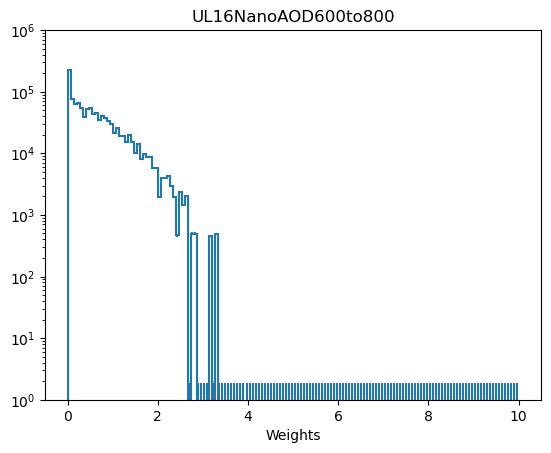

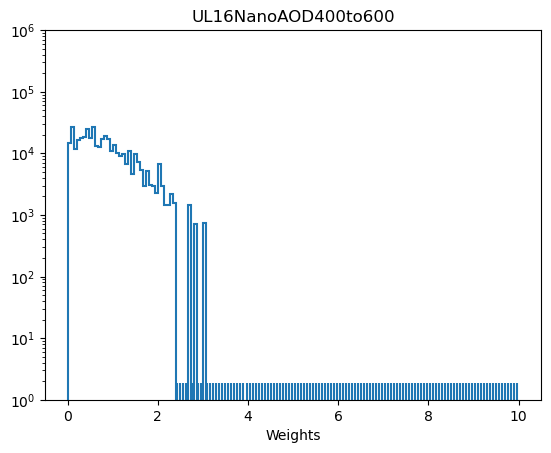

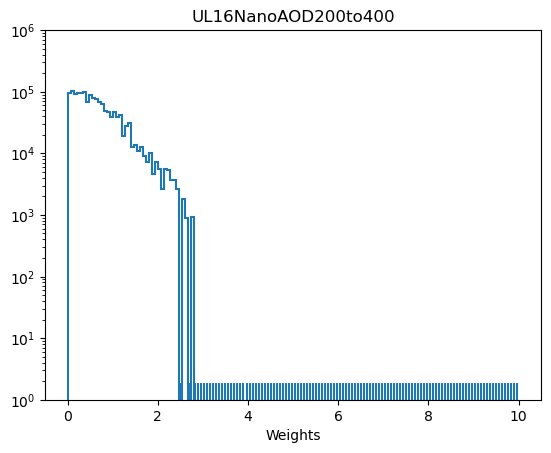

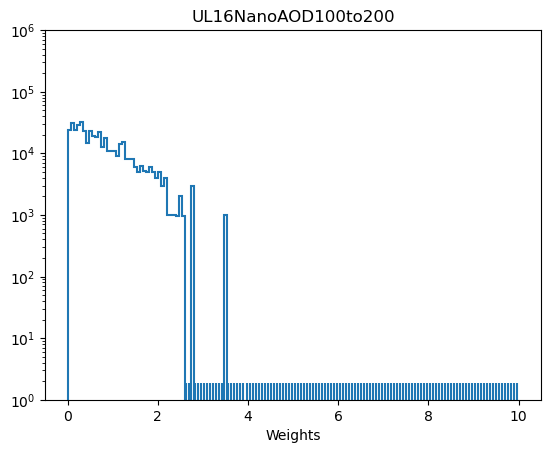

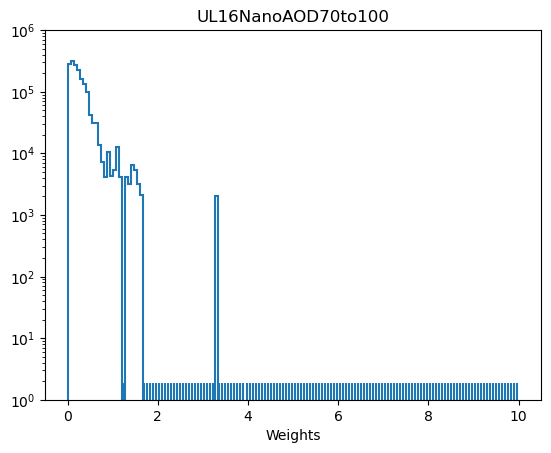

In [53]:
figs = []
for i in range(output['w'].axes[0].size):
    print(output['w'].axes[0].value(i))
    f = plt.figure(i)
    
    output['w'][i,:].plot()
    plt.title(output['w'].axes[0].value(i))
    plt.yscale("log")
    plt.ylim([1,1e6])
    figs.append(f)